<a href="https://colab.research.google.com/github/Parikshit07111996/School-Of-AI/blob/master/EVA_S8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
import torch.nn as nn
%matplotlib inline
import torchvision.transforms as transforms
import torch.nn.functional as F

In [23]:
from google.colab import auth                    # Other necessary packages
from oauth2client.client import GoogleCredentials
!pip install pydrive                             # Package to use Google Drive API - not installed in Colab VM by default
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive


In [0]:

auth.authenticate_user()                         # Follow prompt in the authorization process
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()

In [0]:
drive = GoogleDrive(gauth)
your_module = drive.CreateFile({'id':'19SZtdxMzX0n0K7mK5SJ_EbfgRdRZaDJ1'})
your_module.GetContentFile("Data_Loader_V4.py")

# Data Loader.py

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms


def Load_data():
    transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                              shuffle=True, num_workers=2)
    
    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                             shuffle=False, num_workers=2)
    
    classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    return [transform, trainset, trainloader, testset, testloader, classes];

In [27]:
#from Data_Loader_V4 import Load_data
#Load_data()
transform, trainset, trainloader, testset, testloader, classes=Load_data()

Files already downloaded and verified
Files already downloaded and verified


  cat plane  bird  deer


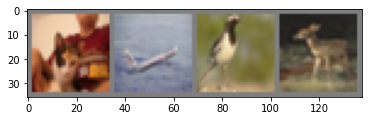

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
your_module = drive.CreateFile({'id':'1gnBM7Pu-9iG-XOJXWjqaF5fciysGC-Zj'})

your_module.GetContentFile("Model_architecture_Resnet.py")

In [0]:
import Model_architecture_Resnet

In [32]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = ResNet18().to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [0]:
def train(model, device, trainloader, epochs, optimizer,criterion):
    for epoch in range(epochs):  # loop over the dataset multiple times
    
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data
            inputs=inputs.to(device)
            labels=labels.to(device)
            # zero the parameter gradients
            optimizer.zero_grad()
    
            # forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    
            # print statistics
            running_loss += loss.item()
            if i % 2000 == 1999:    # print every 2000 mini-batches
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 2000))
                running_loss = 0.0
    
    print('Finished Training')

In [0]:
your_module = drive.CreateFile({'id':'1C3Qw5_87K6CdmAKKQD9foM-F7V4Ij2bk'})

your_module.GetContentFile("Train_package_V4.py")
import Train_package_V4 


In [0]:
epochs=25

train(model,device,trainloader,epochs,optimizer,criterion)

[1,  2000] loss: 1.984
[1,  4000] loss: 1.611


In [0]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
CPUmodel= Model_architecture_resnet.ResNet18()
CPUmodel.load_state_dict(model.cpu().state_dict())


outputs = CPUmodel(images)

In [0]:

__,,  predictedpredicte  = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [0]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = CPUmodel(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

In [0]:

your_moduleyour_mo  = drive.CreateFile({'id':'1oBz1RdwrlvB3QTaDBWc8Evs-mRM6EzbG'})

your_module.GetContentFile("Accuracy_cal_package_V2.py")
from Accuracy_cal_package_V2 import Accuracy_calculation

In [0]:
Accuracy_calculation(testloader,CPUmodel,classes)